In [33]:
import os
import rasterio
from rasterio import plot
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from typing import List

In [41]:
features_path = os.path.join('data', 'features')

def load_image(product:str, band:str, station:str) -> rasterio.DatasetReader:
    return rasterio.open(os.path.join(features_path, product, band, f'{station}.jp2'))

In [42]:
def get_rgb_image(product:str, bands:List[str], station:str) -> NDArray[np.floating]:
    images = [load_image(product, band, station) for band in bands]
    rgb_image = np.stack([img.read(1) for img in images], axis=2) / 10000
    [img.close() for img in images]
    return rgb_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


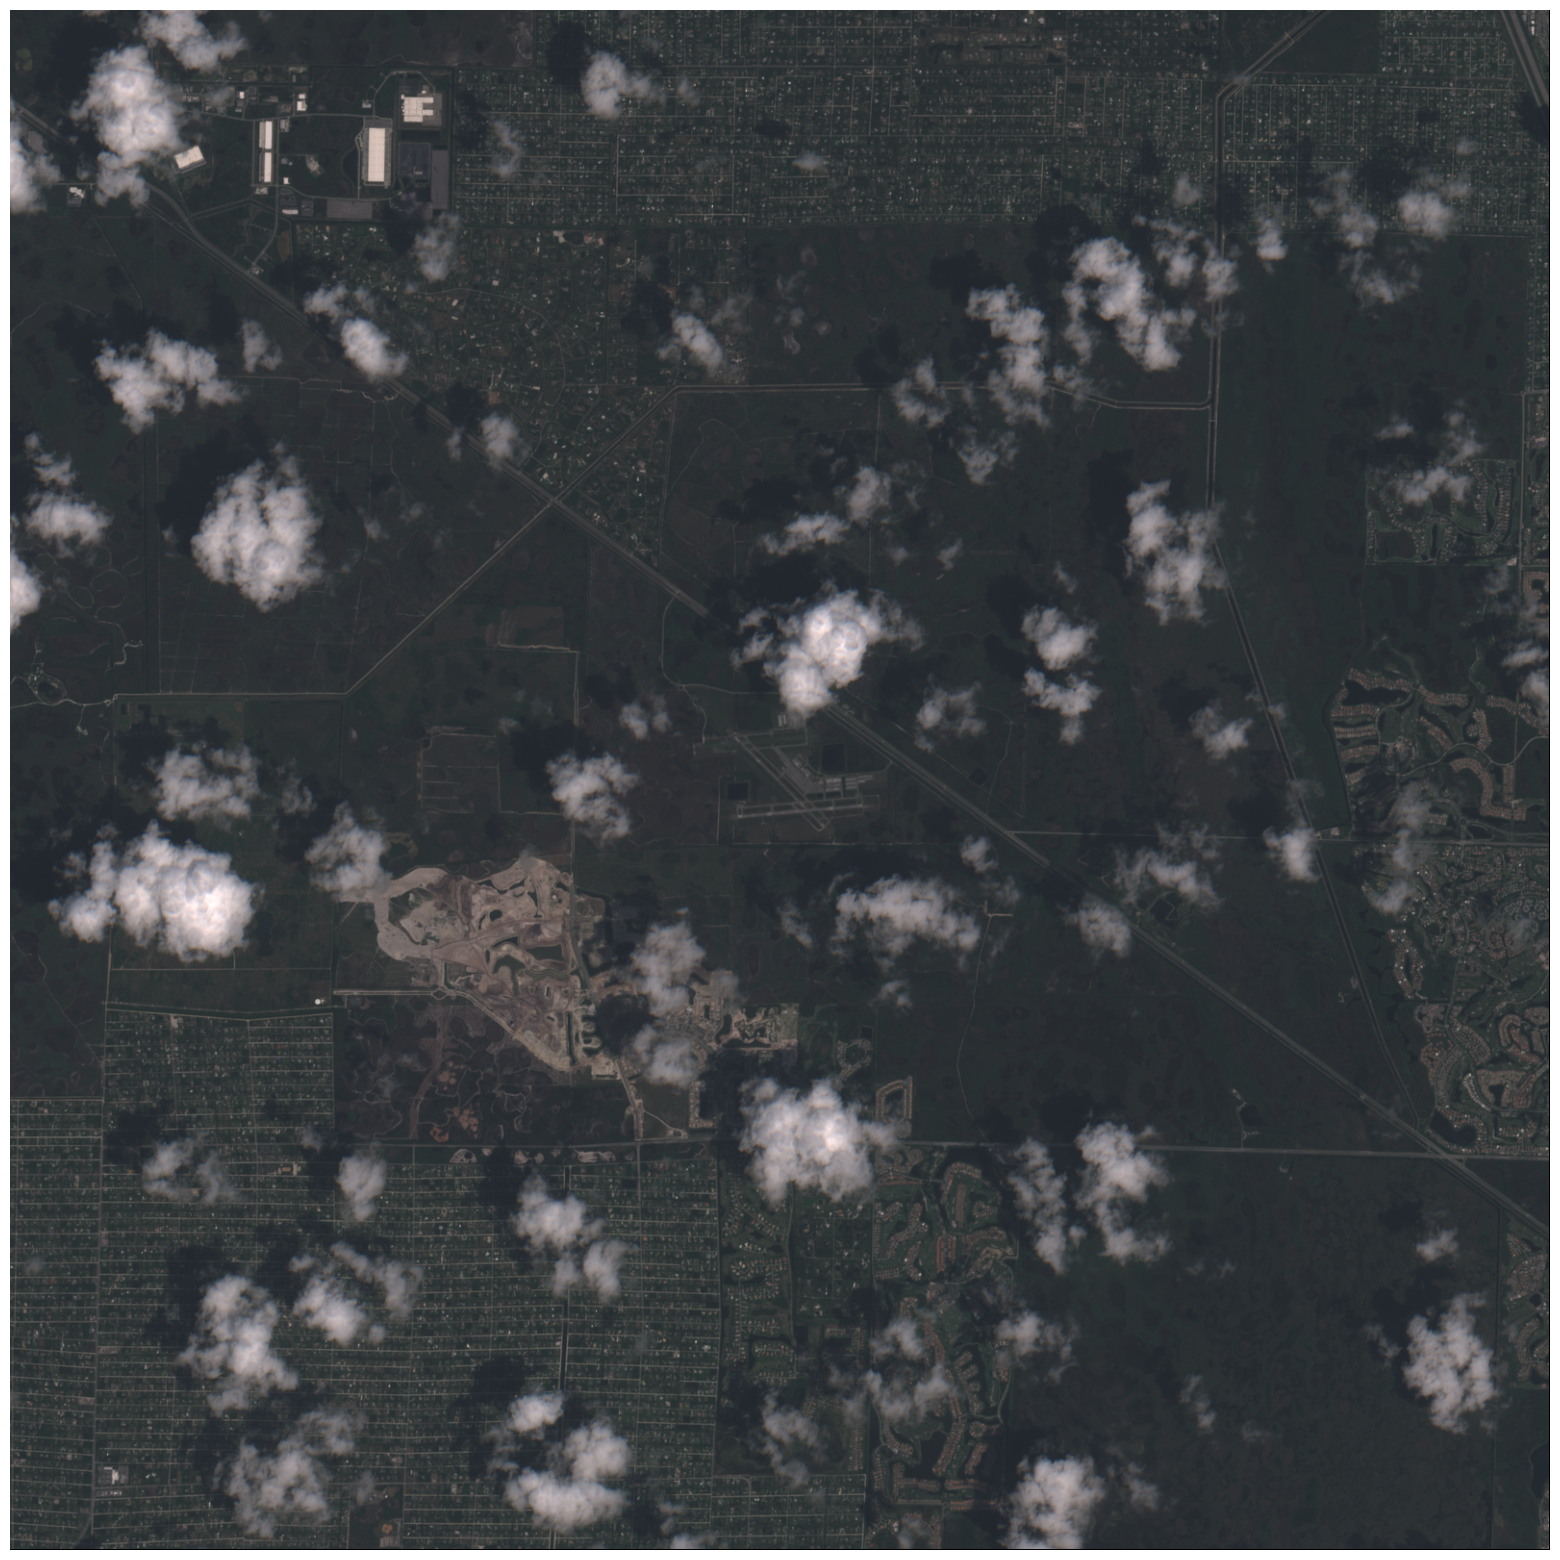

In [63]:
rgb_image = get_rgb_image('2d1073ce-df73-46ca-8b12-3838e2b81dac', ['B4', 'B3', 'B2'], 'F45')
fig = plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(rgb_image)
plt.savefig("TCI.png", bbox_inches='tight', pad_inches=0)